In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import os


In [2]:
csvpath=os.path.join('output', 'best_picture_noms.csv')
best_movie=pd.read_csv(csvpath)

In [3]:

best_movie=best_movie.drop(columns='Unnamed: 0')

In [4]:
genre=best_movie['Genre'].value_counts()
genre_type=best_movie['Genre'].unique()

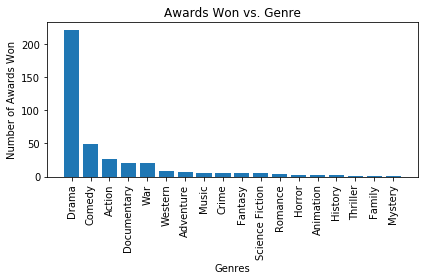

In [5]:

plt.xticks(rotation='vertical')
plt.xlabel("Genres")
plt.ylabel("Number of Awards Won")
plt.title("Awards Won vs. Genre")
plt.bar(genre_type, genre)
plt.tight_layout()
plt.savefig('Output/Award_by_Genre.png')

In [ ]:
#Originally planned to also look at how the winning genre changed over time but given the overwhelming amount of drama
#there would not be any noticible patterns to see.

In [6]:
ordered_movies=best_movie.sort_values('Release Date')
ordered_movies=ordered_movies.reset_index(drop=True)

for i in range(len(ordered_movies['Budget'])):
    if ordered_movies['Budget'][i]==0:
        try:
            ordered_movies=ordered_movies.drop([i])
        except KeyError:
            print('fail')


In [7]:
ordered_movies=ordered_movies.reset_index(drop=True)



In [8]:
release_year=pd.read_csv('Output/best_picture_omdb_dataframe.csv')
year_data=release_year[['Title', 'Year']].dropna()
year_data=year_data.sort_values('Year')
year_data=year_data.reset_index(drop=True)
year_data

,Title,Year
0,The Love Parade,1929
1,Disraeli,1929
2,All Quiet on the Western Front,1930
3,The Big House,1930
4,The Divorcee,1930
...,...,...
535,Call Me by Your Name,2017
536,"Three Billboards Outside Ebbing, Missouri",2017
537,A Star Is Born,2018
538,Little Women,2019


In [9]:
drop=year_data.loc[year_data['Year']<'1950']
for i in range(len(year_data)):
    try:
        if year_data['Year'][i]==drop['Year'][i]:
            year_data=year_data.drop([i])
    except KeyError:
        break
year_data=year_data.reset_index(drop=True)
year_data

,Title,Year
0,Born Yesterday,1950
1,All About Eve,1950
2,Sunset Blvd.,1950
3,A Streetcar Named Desire,1951
4,Quo Vadis,1951
...,...,...
396,Call Me by Your Name,2017
397,"Three Billboards Outside Ebbing, Missouri",2017
398,A Star Is Born,2018
399,Little Women,2019


In [10]:
data_chart=pd.merge(year_data, ordered_movies, on='Title', how='inner')
graphing=data_chart.groupby(["Year"])
graphing["Budget"].mean()

Year
1950    1.400000e+06
1951    4.048968e+06
1952    2.365000e+06
1953    2.587500e+06
1954    1.455000e+06
            ...     
2014    2.038750e+07
2015    7.057143e+07
2016    2.387500e+07
2017    3.293750e+07
2018    3.600000e+07
Name: Budget, Length: 70, dtype: float64

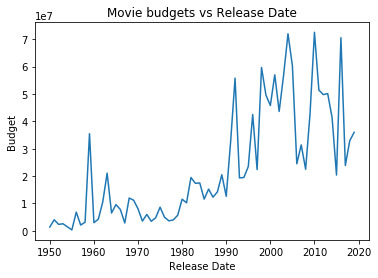

In [11]:
date=np.arange(1950, 2020)
budget=graphing['Budget'].mean()
plt.xlabel("Release Date")
#plt.xticks(data_chart['Year'])
#plt.xticks(rotation='vertical')
plt.ylabel("Budget")
plt.title("Movie budgets vs Release Date")
plt.plot(date, budget)
plt.savefig('Output/Movie_budget_over_time.png')

In [ ]:
#chart scaled for e+07, but still indicates an overall increase in budget of award winning films over the years.

In [ ]:
director=pd.read_csv('cleaned_director.csv')

In [ ]:
director=director.drop(columns='Unnamed: 0')
director['Production 1']=director['Production 1'].dropna()

In [ ]:
x_axis=director['Production 1'].dropna().unique()
y_axis=director['Production 1'].dropna().value_counts()

In [ ]:
len(x_axis)

In [ ]:
director=director[director['Year']>='1950']

director.reset_index(drop=True)

In [ ]:
plt.xticks(rotation='vertical')
y_axis=y_axis>5
plt.xlabel("Production companies")
plt.ylabel("Number of directors nominated for awards")
plt.title("Amount of nominated directors vs. Production company")
plt.tight_layout()
plt.bar(np.arange(y_axis), y_axis>'5')
plt.show()